# NASA Common Research Model
## Drag Prediction Workshop


#### References

    


## Define case name
This is the solver case to be analysed

In [1]:
case_name = 'dpws_L3'

## Define Data Location
For remote data the interaction will use ssh to securely interact with the data<br/>
This uses the reverse connection capability in paraview so that the paraview server can be submitted to a job scheduler<br/>
Note: The default paraview server connection will use port 11111

In [2]:
remote_data = True

data_dir='/gpfs/thirdparty/zenotech/home/dstandingford/DPWS/L3/RESULTS_13'
data_host='dstandingford@vis03'

remote_server_auto = True

#paraview_cmd='mpiexec -n 1 ~/apps/Paraview/bin/pvserver --use-offscreen-rendering -rc --client-host=localhost -sp=11113'
paraview_cmd='mpiexec /gpfs/cfms/apps/bin/pvserver'
if not remote_server_auto:
    paraview_cmd=None

if not remote_data:
    data_host='localhost'
    paraview_cmd=None

### Initialise Environment

In [3]:
%pylab inline
from paraview.simple import *
paraview.simple._DisableFirstRenderCameraReset()
import pylab as pl

Populating the interactive namespace from numpy and matplotlib
paraview version 4.2.0-77-g31a1d2a


### Data Connection
This starts paraview server on remote host and connects

In [4]:
from zutil.post import pvserver_connect
if remote_data:
    pvserver_connect(data_host=data_host,data_dir=data_dir,paraview_cmd=paraview_cmd)

Starting pvserver connect
Starting pvserver process
Attempting to find unused port
[dstandingford@vis03] Executing task 'port_test'
[dstandingford@vis03] Executing task 'port_test'
[dstandingford@vis03] Executing task 'port_test'
Selected Port: 12002
[dstandingford@vis03] Executing task 'pvserver'
[dstandingford@vis03] run: /bin/bash -l -c "cd /gpfs/thirdparty/zenotech/home/dstandingford/DPWS/L3/RESULTS_13 && sleep 2;mpiexec /gpfs/cfms/apps/bin/pvserver -rc --client-host=localhost -sp=12002"
[dstandingford@vis03] out: 
[dstandingford@vis03] out: 		   _____ ______ __  __  _____ 
[dstandingford@vis03] out: 		  / ____|  ____|  \/  |/ ____|
[dstandingford@vis03] out: 		 | |    | |__  | \  / | (___  
[dstandingford@vis03] out: 		 | |    |  __| | |\/| |\___ \ 
[dstandingford@vis03] out: 		 | |____| |    | |  | |____) |
[dstandingford@vis03] out: 		  \_____|_|    |_|  |_|_____/ 
[dstandingford@vis03] out: 
[dstandingford@vis03] out: ++++++++++++++++++++++++++++: System Data :+++++++++++++++++

### Get control dictionary

In [5]:
from zutil.post import get_case_parameters,print_html_parameters
parameters=get_case_parameters(case_name,data_host=data_host,data_dir=data_dir)

### Get status file

In [6]:
from zutil.post import get_status_dict
status=get_status_dict(case_name,data_host=data_host,data_dir=data_dir)
num_procs = str(status['num processor'])
print num_procs

48


### Define test conditions

In [7]:
alpha = 2.217 # degrees
reference_area = 594720.0 # inches^2
reference_length = 275.8 # inches, mean chord. 
reference_span = 1156.75 # inches

from IPython.display import HTML
HTML(print_html_parameters(parameters))

pressure,101325.0
temperature,310.928
Reynolds No,5000000.0
Ref length,275.8
Speed,0.0
Mach No,0.85


In [8]:
from zutil.post import cp_profile_wall_from_file

def plot_cp_profile(ax,file_root,span_loc):
    
    force_data = cp_profile_wall_from_file(file_root,
                              [0.0,1.0,0.0],
                              [0, span_loc*reference_span, 0],
                              func=plot_array,
                              axis=ax,
                              span_loc=span_loc,
                              alpha=alpha)
    
def plot_array(data_array,pts_array,**kwargs):
    ax = kwargs['axis']
    span_loc = kwargs['span_loc']
    cp_array = data_array.GetPointData()['cp']
    chord_array = data_array.GetPointData()['chord']
    ax.plot(chord_array, cp_array , 'b.',color='b',label='zCFD SST')

### Comparison Data

In [9]:
# Reproduce plots from DPWS presentation, page 45
# Pressure data points (reference semi-span: 1156.75) 
# Station Type          WBL      ETA     Chord
# 1       CFD Cut Only  121.459  0.1050  466.5
# 2       CFD Cut Only  133.026  0.1150  459.6
# 3       CFD Cut Only  144.594  0.1250  452.7
# 4       Pressure Tap  151.074  0.1306  448.8
# 5       Pressure Tap  232.444  0.2009  400.7
# 6       Pressure Tap  327.074  0.2828  345.0
# 7       CFD Cut Only  396.765  0.3430  304.1
# 8       CFD Cut Only  427.998  0.3700  285.8
# 9       Pressure Tap  459.370  0.3971  278.1
# 10      Pressure Tap  581.148  0.5024  248.3
# 11      Pressure Tap  697.333  0.6028  219.9
# 12      Pressure Tap  840.704  0.7268  184.8
# 13      Pressure Tap  978.148  0.8456  151.2
# 14      Pressure Tap  1098.126 0.9500  121.7
# 15      CFD Cut Only  1122.048 0.9700  116.0
# 16      CFD Cut Only  1145.183 0.9900  110.5

#eta_values = [0.1306, 0.2828, 0.3971, 0.5024, 0.7268, 0.9500] # stations 4, 6, 9, 10, 12, 14
from collections import OrderedDict
station_values = OrderedDict([("S04" , 0.1306), ("S06" , 0.2828), ("S09" , 0.3971), ("S10" , 0.5024) , ("S12" , 0.7268), ("S14" , 0.9500)])

#colours can be b: blue, g: green, r: red, c: cyan, m: magenta, y: yellow, k: black, w: white

sources = [["Edge SST","r"], ["CFD++ SST","g"], ["FUN3D SA", "m"], ["MFlow SA", "y"]] 

dpws_comparative_data = eval(open('data/DPWS_Comparative_Data.py', 'r').read())


## Cp Profile

/Applications/paraview.app/Contents/Python/paraview/vtk/numpy_interface/dataset_adapter.py:126: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if array == None:


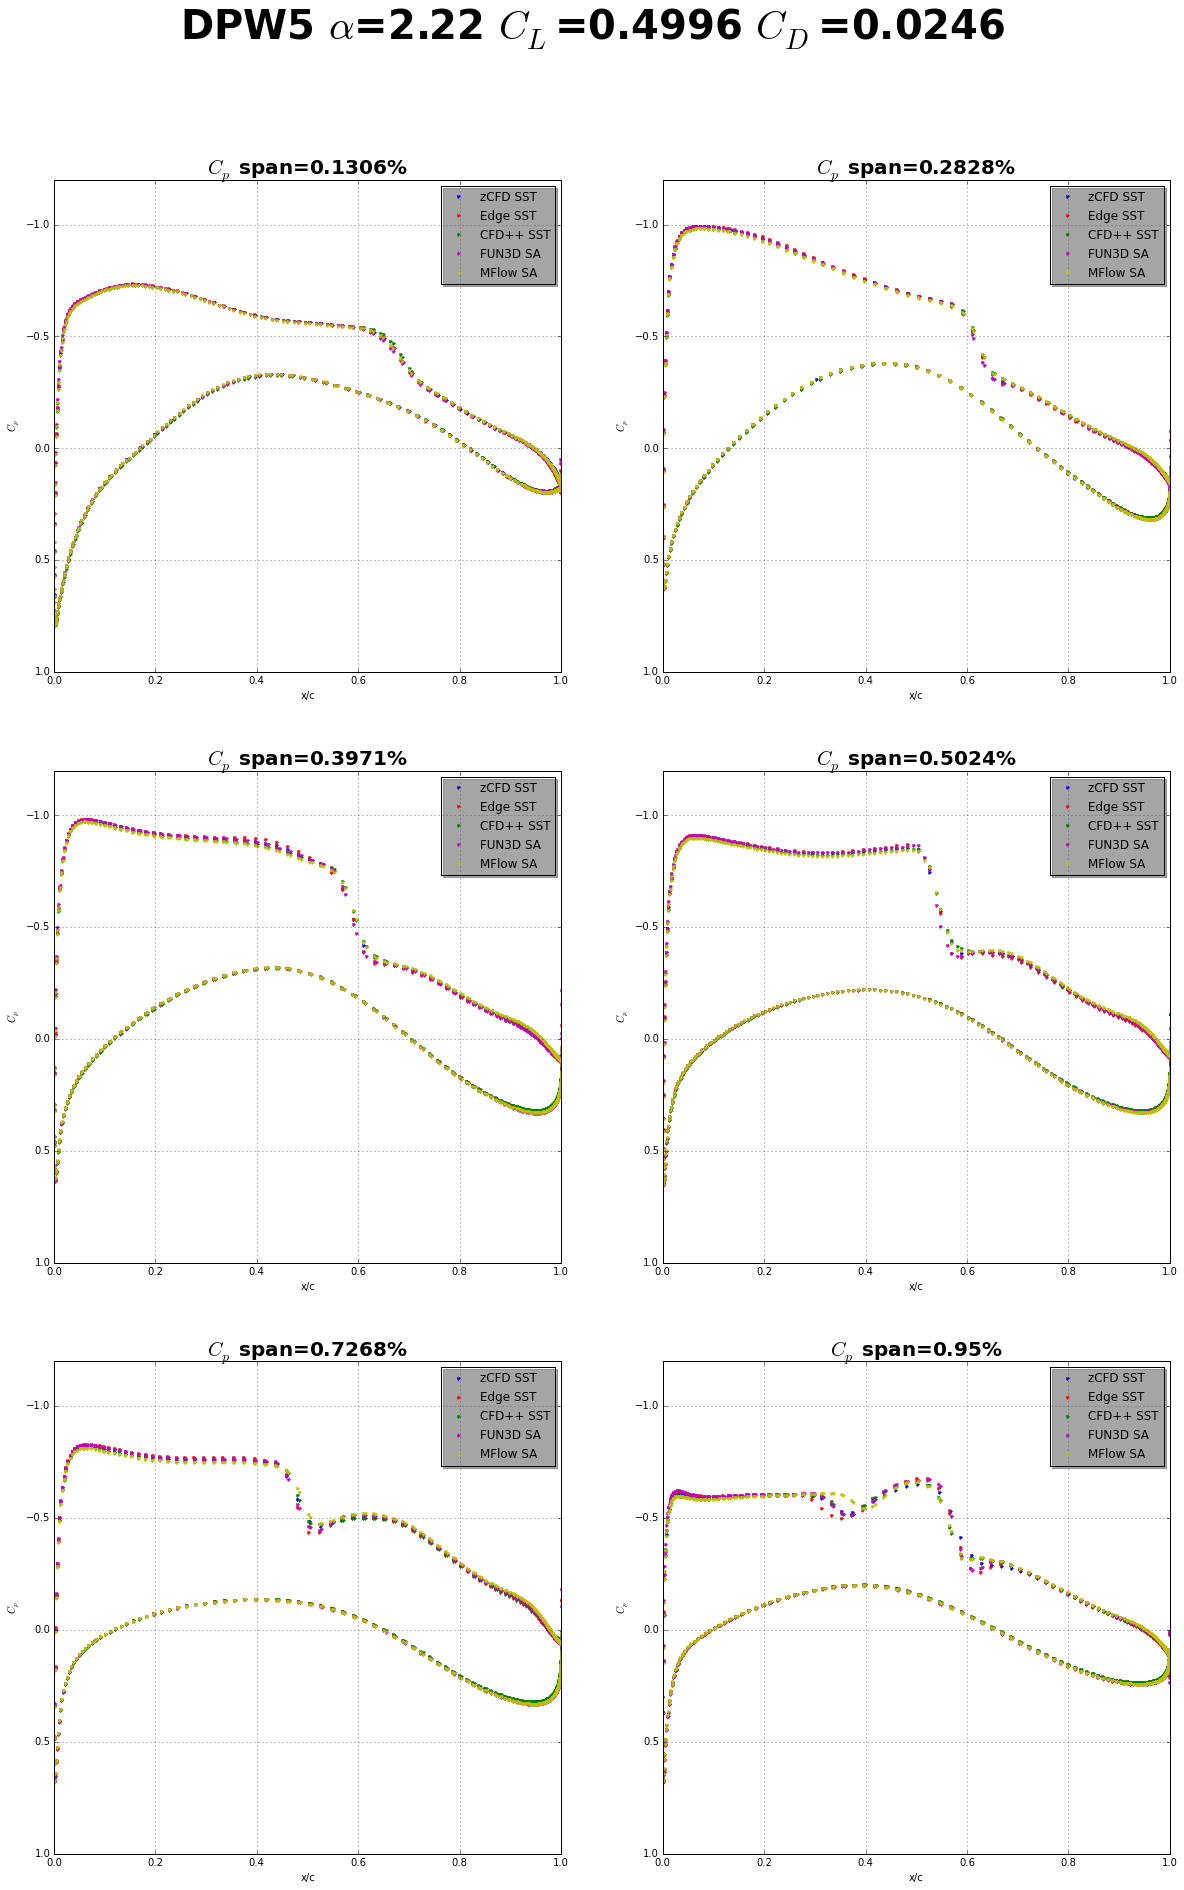

/Users/David/Documents/zPost/ipynb/NASA_CRM/images/DPWS_cp_profile.png

In [10]:
from zutil.post import get_case_root
from zutil.post import calc_force_wall


pressure_force, friction_force = calc_force_wall(get_case_root(case_name,num_procs),
                                                 [],half_model=True,
                                                 alpha=alpha)

C_L = (pressure_force[2] + friction_force[2])/reference_area
C_D = (pressure_force[0] + friction_force[0])/reference_area

fig = pl.figure(figsize=(20, 30),dpi=100, facecolor='w', edgecolor='k')
fig.suptitle(r'DPW5 $\alpha$=' + ('%.2f ' % alpha) + ('$C_L$=%.4f ' % C_L) + ('$C_D$=%.4f ' % C_D), fontsize=40, fontweight='bold')

plot = 1

for station in station_values:
    span_loc = station_values[station]
    ax = fig.add_subplot(len(station_values)/2,2,plot)
    ax.set_title('$C_p$ span='+str(span_loc)+'%', fontsize=20, fontweight='bold')
    ax.grid(True)
    ax.set_xlabel('x/c')
    ax.set_ylabel('$C_p$')
    ax.axis([0.0,1.0,1.0,-1.2])
    plot_cp_profile(ax,get_case_root(case_name,num_procs),span_loc)
    
    for source, colour in sources:
        plotlist_x = []
        plotlist_y = []
        for key, value in dpws_comparative_data["L3"][source][station]['X/C'].iteritems():
            plotlist_x.append(value)
        for key, value in dpws_comparative_data["L3"][source][station]['CP'].iteritems():
            plotlist_y.append(value)
        
        ax.plot(plotlist_x, plotlist_y, 'r.', color=colour, label=source)
        
    ax.legend(loc='upper right', shadow=True, scatterpoints=1, numpoints=1)

    plot += 1
    
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('images/DPWS_cp_profile.pdf')
pp.savefig()
pp.close()
fig.savefig("images/DPWS_cp_profile.png")
show()
from IPython.display import FileLink, display 
display(FileLink('images/DPWS_cp_profile.png'))

## Convergence

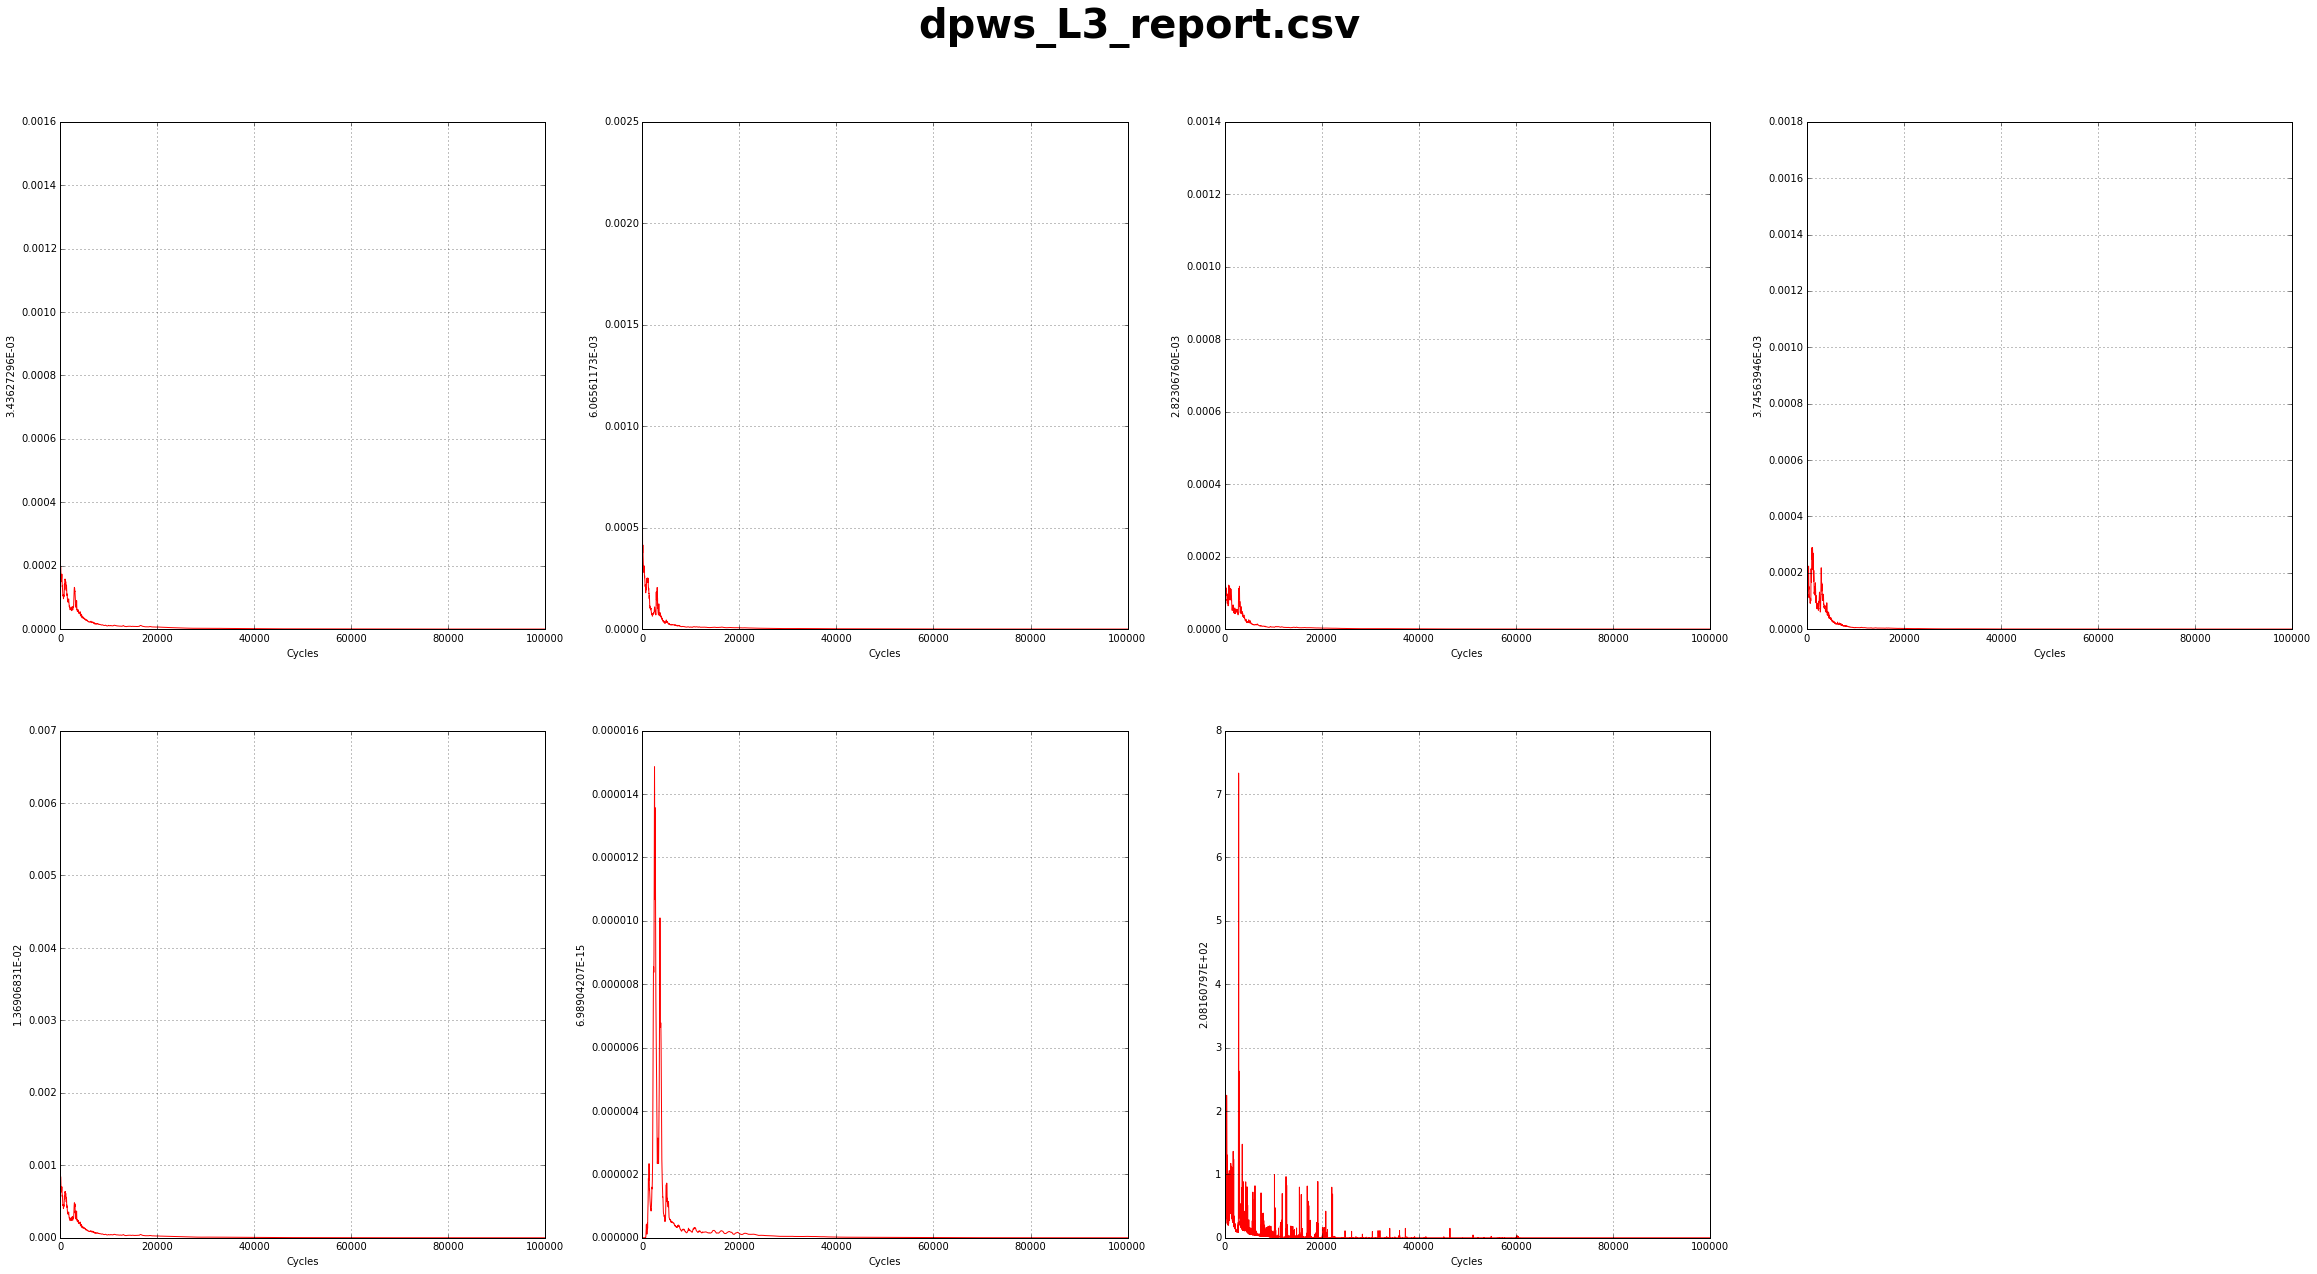

In [11]:
from zutil.post import residual_plot, get_case_report
residual_plot(get_case_report(case_name))
show()

### Cleaning up

In [12]:
if remote_data:
    #print 'Disconnecting from remote paraview server connection'
    Disconnect()

Exiting...
[dstandingford@vis03] out: 